<a href="https://colab.research.google.com/github/arsan13/data-science/blob/main/LogisticRegression_SUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression - SUV Dataset**

In [ ]:
import sklearn
import pandas
import seaborn
import matplotlib
%matplotlib inline

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
data_set = pandas.read_csv ('/content/suv_data.csv')

In [ ]:
data_set.head (10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
data_set.shape

(400, 5)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data_set.groupby ('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [ ]:
# drops unnecessary columns
cleaned_data_set = data_set.drop (columns = ['User ID'], axis = '1')
cleaned_data_set.head ()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
cleaned_data_set.describe ()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


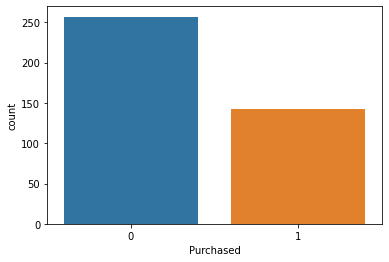

In [ ]:
seaborn.countplot (x = 'Purchased', data = cleaned_data_set)

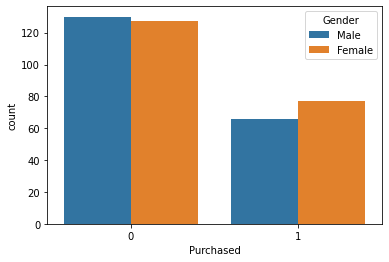

In [ ]:
seaborn.countplot ( x = 'Purchased', hue = 'Gender', data = cleaned_data_set)

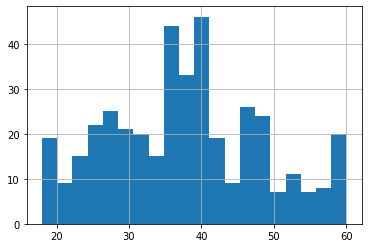

In [ ]:
data_set ['Age'].hist(bins = 20)

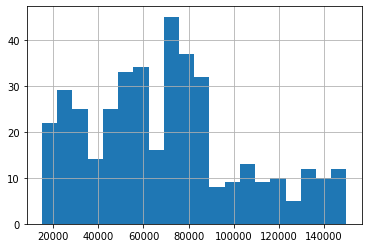

In [ ]:
data_set ['EstimatedSalary'].hist(bins = 20)

In [ ]:
age_category = []
for i in range (0, len  (data_set ['Age'])):
    if cleaned_data_set ['Age'][i] <= 20:
        age_category.append ('A');
    elif 20 < cleaned_data_set ['Age'][i] <= 26:
        age_category.append ('B');
    elif 26 < cleaned_data_set ['Age'][i] <= 30:
        age_category.append ('C');
    elif 30 < cleaned_data_set ['Age'][i] <= 40:
        age_category.append ('D');
    elif 40 < cleaned_data_set ['Age'][i] <= 50:
        age_category.append ('E');
    else:
        age_category.append ('F');

age_data_frame = pandas.DataFrame (data = age_category, columns = ['AgeCategory'])
augmented_data_set = pandas.concat([cleaned_data_set, age_data_frame], axis = 1)
augmented_data_set.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


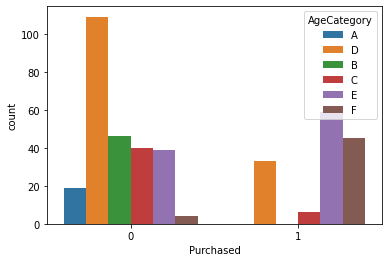

In [ ]:
seaborn.countplot ( x = 'Purchased', hue = 'AgeCategory', data = augmented_data_set)

In [ ]:
income_category = []
for i in range (0, len  (data_set ['EstimatedSalary'])):
    if cleaned_data_set ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < cleaned_data_set ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < cleaned_data_set ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < cleaned_data_set ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < cleaned_data_set ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < cleaned_data_set ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < cleaned_data_set ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');

income_data_frame = pandas.DataFrame (data = income_category, columns = ['IncomeCategory'])
augmented_data_set_2 = pandas.concat([augmented_data_set, income_data_frame], axis = 1)
augmented_data_set_2.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


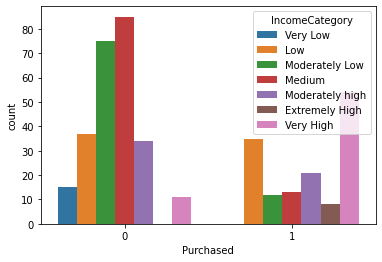

In [ ]:
seaborn.countplot ( x = 'Purchased', hue = 'IncomeCategory', data = augmented_data_set_2)

In [ ]:
binary_age = pandas.get_dummies (augmented_data_set_2 ['AgeCategory'])
binary_age.head ()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


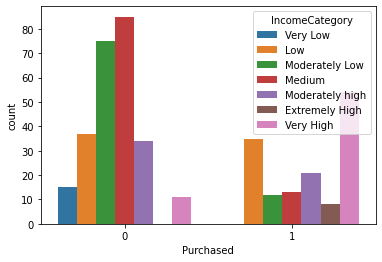

In [ ]:
seaborn.countplot ( x = 'Purchased', hue = 'IncomeCategory', data = augmented_data_set_2)

In [ ]:
binary_income = pandas.get_dummies (augmented_data_set_2 ['IncomeCategory'])
binary_income.head ()

,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
final_data_set  = pandas.concat ([augmented_data_set_2, binary_age, binary_gender, binary_income], axis = 1)
final_data_set_1 = final_data_set.drop (columns = ['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis = 1)
final_data_set_1.head ()

,Purchased,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
Y = final_data_set_1 ['Purchased']
X = final_data_set_1.drop (columns = ['Purchased'], axis = 1)

In [ ]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)
model = LogisticRegression (solver = 'liblinear')
model.fit (X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict (X_test)

In [ ]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
print (confusion_matrix (Y_test, predictions))

[[56  2]
 [ 2 20]]


In [ ]:
accuracy_score (Y_test, predictions)

0.95

In [ ]:
Y = data_set.iloc [:, 4]
X = data_set.iloc [:, 2:4]

In [ ]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)

In [ ]:
classifier = LogisticRegression (random_state = seed, solver = 'liblinear')
classifier.fit (X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = classifier.predict (X_test)

In [ ]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        58
           1       0.50      0.05      0.08        22

    accuracy                           0.73        80
   macro avg       0.62      0.51      0.46        80
weighted avg       0.67      0.72      0.63        80



In [ ]:
accuracy_score (Y_test, predictions)

0.725